**Prediction for Renttherunway and ModCloth Dataset**

In [1]:
#importing the libraries
import tensorflow as tf
import json
import csv
import pandas as pd

tf.enable_eager_execution()

In [2]:
#mounted to drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/'

**Reading Renttherunway dataset.**

In [115]:
#read rentherunway data
cloth_data = pd.read_json(file_path+ 'renttherunway_final_data.json', lines=True)
cloth_data.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [0]:
cloth_data.columns = ['fit','user_id', 'bra_size', 'item_id' , 'weight', 'rating', 'rented_for', 'review_text','body_type', 'review_summary', 'category','height', 'size','age', 'review_date']

**Reading Modcloth Dataset.**

In [78]:
# reading the json data
mod_cloth_data = pd.read_json(file_path + 'modcloth_final_data.json', lines=True)
mod_cloth_data.head(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


In [0]:
mod_cloth_data.columns = ['item_id','waist', 'size', 'quality' , 'cup_size', 'hips', 'bra_size', 'category','bust', 'height', 'user_name','length', 'fit','user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_text']

**Execute the below 4 steps for using renttherunway unbaised data.**

In [0]:
#for extracting un-biased data
data = cloth_data[cloth_data.fit  == 'fit']
data = data.head(25000)
data.head(1)

In [0]:
data_small = cloth_data[cloth_data.fit  == 'small'] 
data_small.head(1)

In [0]:
data_large = cloth_data[cloth_data.fit  == 'large']
data_large.head(1)

In [0]:
cloth_data = pd.concat([data,data_small,data_large])
cloth_data.head(1)

Execute the below 4 steps for using **modcloth unbaised data**.

In [0]:
mod_data = cloth_data[cloth_data.fit  == 'fit'] 
mod_data = data.head(13000)
mod_data.head(1)

In [0]:
mod_data_small = cloth_data[cloth_data.fit  == 'small'] 
mod_data_small.head(1)

In [0]:
mod_data_large = cloth_data[cloth_data.fit  == 'large'] 
mod_data_large.head()

In [0]:
mod_cloth_data = pd.concat([data,data_small,data_large])
mod_cloth_data.head(1)

**Preprocessing of renttherunway data**

In [0]:
# from sklearn.decomposition import PCA
# import numpy as np
# pca = PCA(n_components=len(cloth_data))
# pca.fit(cloth_data)
# cloth_data = np.matmul(cloth_data, pca.components_.T)

In [0]:
#Code to calculate TF*IDF for the text in “review_text”
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import linear_kernel 
#ds = pd.read_json("renttherunway_final_data.json",lines = True)
#ds['review_text'].head()
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#tfidf_matrix = tf.fit_transform(ds['review_text'])

In [6]:
from sklearn.utils import shuffle
#shuffling the cloth data
cloth_data = shuffle(cloth_data)
cloth_data.head(20)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
122462,fit,248157,32c,724319,135lbs,10.0,wedding,"Pros: True to size, comfortable, and a skin-to...",NaN,"Two thumbs up. Perfect fit for a classy, count...",dress,"5' 5""",4,30.0,"August 14, 2016"
142791,small,918534,36c,1854157,NaN,6.0,party,I was planning on wearing this to a baby showe...,hourglass,Tight...,dress,"5' 7""",14,33.0,"September 21, 2016"
50436,fit,66081,32d,1146287,115lbs,10.0,wedding,Went to a push wedding so I wanted to have som...,athletic,Stunning. Flattering. Elegant.,gown,"5' 8""",5,37.0,"June 8, 2017"
24420,fit,942258,34b,136860,145lbs,10.0,wedding,Fit was a lil large up top while fit thru the ...,pear,The color is gorgeous and the dress is really ...,sheath,"5' 5""",16,39.0,"July 28, 2014"
26010,fit,959029,NaN,683251,NaN,8.0,work,I rented this for a work conference that was b...,hourglass,Lovely and versatile,dress,"5' 6""",16,33.0,"October 5, 2015"
46252,fit,234668,38c,810197,165lbs,8.0,work,I rented this for a fundraiser for a nonprofit...,pear,"Beautiful color and fabric, comfortable fit",dress,"5' 6""",24,34.0,"October 1, 2017"
18648,fit,836212,34b,901186,120lbs,8.0,party,This dress was perfect to have in my closet as...,athletic,I wanted to keep it! Can I?,dress,"5' 3""",4,25.0,"February 16, 2016"
90470,fit,597320,30d,1159412,110lbs,10.0,wedding,Fitted through chest and flares at the bottom....,petite,Lovely dress and easy to dance in! Has enough ...,dress,"5' 3""",1,27.0,"July 5, 2017"
90115,fit,675794,NaN,273492,140lbs,10.0,work,It fits true to size but there is no give in t...,NaN,flirty,dress,"5' 9""",8,31.0,"May 18, 2017"
19923,small,685047,34d,480832,140lbs,10.0,wedding,I received so many compliments. As the other r...,athletic,Stunning!,dress,"5' 5""",16,27.0,"July 10, 2017"


In [94]:
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
fit               192544 non-null object
user_id           192544 non-null int64
bra_size          174133 non-null object
item_id           192544 non-null int64
weight            162562 non-null object
rating            192462 non-null float64
rented_for        192534 non-null object
review_text       192544 non-null object
body_type         177907 non-null object
review_summary    192544 non-null object
category          192544 non-null object
height            191867 non-null object
size              192544 non-null int64
age               191584 non-null float64
review_date       192544 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [117]:
cloth_data.bra_size.fillna(" ", inplace=True)
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
cloth_data.head(20)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
5,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016"
6,fit,336066,34c,568429,112lbs,10.0,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27.0,"December 7, 2017"
7,fit,86661,34d+,130259,118lbs,10.0,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,"5' 3""",8,65.0,"January 1, 2013"
8,fit,166228,36d,1729232,NaN,10.0,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,"5' 6""",21,27.0,"June 27, 2016"
9,fit,154309,32b,1729232,114lbs,10.0,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,"5' 3""",1,33.0,"October 17, 2016"


In [118]:
cloth_data['cup_size'] = cloth_data['bra_size']
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,cup_size
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",34d


In [119]:
cloth_data['bra_size'] = cloth_data['bra_size'].map(lambda x: str(x)[0:2])
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,cup_size
0,fit,420272,34,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",34d


In [120]:
cloth_data['cup_size'] = cloth_data['cup_size'].map(lambda x: str(x)[2:])
cloth_data.head(5)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,cup_size
0,fit,420272,34,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",d
1,fit,273551,34,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",b
2,fit,360448,,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",
3,fit,909926,34,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",c
4,fit,151944,34,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",b


In [121]:
#dropping unwanted data
cloth_data = cloth_data.drop(['rented_for', 'review_text', 'review_summary', 'category', 'review_date', 'rating', 'weight' , 'body_type' , 'age'], axis=1)
cloth_data.head()

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,"5' 8""",14,d
1,fit,273551,34,153475,"5' 6""",12,b
2,fit,360448,,1063761,"5' 4""",4,
3,fit,909926,34,126335,"5' 5""",8,c
4,fit,151944,34,616682,"5' 9""",12,b


In [0]:
cloth_data=cloth_data.replace(r'^\s*$', np.nan, regex=True)

In [123]:
cloth_data.bra_size.fillna("-1", inplace=True)
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
cloth_data.head(20)

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,"5' 8""",14,d
1,fit,273551,34,153475,"5' 6""",12,b
2,fit,360448,-1,1063761,"5' 4""",4,NaN
3,fit,909926,34,126335,"5' 5""",8,c
4,fit,151944,34,616682,"5' 9""",12,b
5,fit,734848,32,364092,"5' 8""",8,b
6,fit,336066,34,568429,"5' 3""",4,c
7,fit,86661,34,130259,"5' 3""",8,d+
8,fit,166228,36,1729232,"5' 6""",21,d
9,fit,154309,32,1729232,"5' 3""",1,b


In [124]:
cloth_data.cup_size.fillna('Unknown', inplace=True)
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
cloth_data.head(20)

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,"5' 8""",14,d
1,fit,273551,34,153475,"5' 6""",12,b
2,fit,360448,-1,1063761,"5' 4""",4,Unknown
3,fit,909926,34,126335,"5' 5""",8,c
4,fit,151944,34,616682,"5' 9""",12,b
5,fit,734848,32,364092,"5' 8""",8,b
6,fit,336066,34,568429,"5' 3""",4,c
7,fit,86661,34,130259,"5' 3""",8,d+
8,fit,166228,36,1729232,"5' 6""",21,d
9,fit,154309,32,1729232,"5' 3""",1,b


In [125]:
#data preprocessing. Convert the height to cms
def convert_to_cms(x):
  if type(x) == type(1.0):
    return
  try:
    return (int(x[0])*30.48) + (int(x[3:-1])*2.54)
  except:
    return (int(x[0])*30.48)

cloth_data.height = cloth_data.height.apply(convert_to_cms)
cloth_data.head()

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,172.72,14,d
1,fit,273551,34,153475,167.64,12,b
2,fit,360448,-1,1063761,162.56,4,Unknown
3,fit,909926,34,126335,165.10,8,c
4,fit,151944,34,616682,175.26,12,b


In [126]:
#evaluate the total missing data for each column
missing_data = pd.DataFrame({'total_missing': cloth_data.isnull().sum(), 'perc_missing': (cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
fit,0,0.000000
user_id,0,0.000000
bra_size,0,0.000000
item_id,0,0.000000
height,677,0.817732
size,0,0.000000
cup_size,0,0.000000


In [127]:
#fill the null values
cloth_data.height.fillna(-1.0, inplace=True)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,172.72,14,d


In [128]:
missing_data = pd.DataFrame({'total_missing': cloth_data.isnull().sum(), 'perc_missing': (cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
fit,0,0.0
user_id,0,0.0
bra_size,0,0.0
item_id,0,0.0
height,0,0.0
size,0,0.0
cup_size,0,0.0


In [0]:
# Changing the data type in order to consider as a valid feature in tensor flow.
cloth_data['cup_size'] = cloth_data['cup_size'].astype(str)
cloth_data['bra_size'] = cloth_data['bra_size'].astype(int)

In [130]:
cloth_data.head(1)

,fit,user_id,bra_size,item_id,height,size,cup_size
0,fit,420272,34,2260466,172.72,14,d


In [131]:
cloth_data['fit'] = cloth_data.fit.replace('small' , 0)
cloth_data['fit'] = cloth_data.fit.replace("fit" , 1)
cloth_data['fit'] = cloth_data.fit.replace("large" , 2)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,height,size,cup_size
0,1,420272,34,2260466,172.72,14,d


In [132]:
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 7 columns):
fit         192544 non-null int64
user_id     192544 non-null int64
bra_size    192544 non-null int64
item_id     192544 non-null int64
height      192544 non-null float64
size        192544 non-null int64
cup_size    192544 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 10.3+ MB


In [0]:
cloth_data['fit_one_hot'] = cloth_data['fit'].str.get_dummies().values.tolist()
cloth_data = cloth_data.drop('fit',axis=1)

In [0]:
cloth_data.info()

**Preprocessing of modcloth data.**

In [133]:
from sklearn.utils import shuffle

mod_cloth_data = shuffle(mod_cloth_data)
mod_cloth_data.head(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
61511,657081,NaN,12,5.0,b,40.0,36.0,new,36,5ft 6in,jmmccarv,very long,large,784805,9.0,NaN,I liked the fabric (good,I liked the fabric (good for smoothing out) It...
56986,645822,NaN,12,4.0,d,40.0,38.0,tops,NaN,5ft 7in,racergirljen,just right,small,607181,NaN,NaN,I love this cardigan but,I love this cardigan but it runs a little smal...
55363,633619,NaN,8,4.0,ddd/f,35.0,34.0,tops,34,5ft 3in,Tina,slightly long,fit,232272,5.5,NaN,"Very comfortable, love it","Very comfortable, love it for work"
16684,200824,NaN,26,5.0,h,40.0,42.0,dresses,NaN,5ft 4in,kaburdette,just right,large,160140,NaN,NaN,I adore this dress so muc,I adore this dress so much and have been eyein...
29645,404229,NaN,4,3.0,c,37.0,34.0,new,NaN,5ft 2in,pippinfreed,just right,fit,945943,NaN,NaN,Bought this tunic right a,Bought this tunic right after have my baby gir...
72518,752094,NaN,15,5.0,NaN,NaN,NaN,bottoms,NaN,5ft 1in,t.moniz90,just right,large,864892,NaN,NaN,I love this skirt! Althou,I love this skirt! Although I do very sizes be...
20662,314980,NaN,15,5.0,dd/e,40.0,36.0,dresses,36,5ft 4in,Katrina,just right,fit,817215,8.5,average,I absolutely LOVE this dr,I absolutely LOVE this dress! The only thing t...
70880,723977,NaN,20,4.0,c,46.0,38.0,bottoms,NaN,5ft 5in,gersteno,slightly long,fit,810432,NaN,NaN,The fabric is the perfect,The fabric is the perfect thickness: not too h...
28826,401773,NaN,12,5.0,dd/e,41.0,36.0,new,41,5ft 2in,chloe_bessette,just right,fit,853114,9.0,NaN,Wonderful item! Soft with,Wonderful item! Soft with a flattering slimmin...
51513,539980,NaN,12,3.0,c,NaN,36.0,tops,NaN,5ft 6in,adubski,slightly short,fit,547209,NaN,NaN,Great staple for any clos,Great staple for any closet.


In [134]:
mod_cloth_data.bra_size = mod_cloth_data.bra_size.fillna(-1.0)
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
61511,657081,NaN,12,5.0,b,40.0,36.0,new,36,5ft 6in,jmmccarv,very long,large,784805,9.0,NaN,I liked the fabric (good,I liked the fabric (good for smoothing out) It...


In [135]:
mod_cloth_data.cup_size.fillna('Unknown', inplace=True)
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
61511,657081,NaN,12,5.0,b,40.0,36.0,new,36,5ft 6in,jmmccarv,very long,large,784805,9.0,NaN,I liked the fabric (good,I liked the fabric (good for smoothing out) It...


In [136]:
def convert_to_cms(x):
  if type(x) == type(1.0):
    return
  try:
    return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
  except:
    return (int(x[0])*30.48)

mod_cloth_data.height = mod_cloth_data.height.apply(convert_to_cms)
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
61511,657081,NaN,12,5.0,b,40.0,36.0,new,36,167.64,jmmccarv,very long,large,784805,9.0,NaN,I liked the fabric (good,I liked the fabric (good for smoothing out) It...


In [0]:
mod_missing_rows = mod_cloth_data[mod_cloth_data.height.isnull()].index
mod_cloth_data.drop(mod_missing_rows, axis = 0, inplace=True)

In [138]:
missing_data = pd.DataFrame({'total_missing': mod_cloth_data.isnull().sum(), 'perc_missing': (mod_cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,78831,95.218022
size,0,0.000000
quality,64,0.077304
cup_size,0,0.000000
hips,25855,31.229617
bra_size,0,0.000000
category,0,0.000000
bust,69872,84.396666
height,0,0.000000


In [139]:
mod_cloth_data = mod_cloth_data.drop(['hips','waist', 'quality', 'category', 'bust', 'user_name', 'length', 'shoe_size', 'shoe_width' , 'review_summary', 'review_text'], axis=1)
mod_cloth_data.head()

,item_id,size,cup_size,bra_size,height,fit,user_id
61511,657081,12,b,36.0,167.64,large,784805
56986,645822,12,d,38.0,170.18,small,607181
55363,633619,8,ddd/f,34.0,160.02,fit,232272
16684,200824,26,h,42.0,162.56,large,160140
29645,404229,4,c,34.0,157.48,fit,945943


In [0]:
# Changing the data type in order to consider as a valid feature in tensor flow.
mod_cloth_data['cup_size'] = mod_cloth_data['cup_size'].astype(str)
mod_cloth_data['bra_size'] = mod_cloth_data['bra_size'].astype(int)

In [141]:
mod_cloth_data['fit'] = mod_cloth_data.fit.replace('small' , 0)
mod_cloth_data['fit'] = mod_cloth_data.fit.replace("fit" , 1)
mod_cloth_data['fit'] = mod_cloth_data.fit.replace("large" , 2)
mod_cloth_data.head(1)

,item_id,size,cup_size,bra_size,height,fit,user_id
61511,657081,12,b,36,167.64,2,784805


In [143]:
mod_cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81683 entries, 61511 to 27603
Data columns (total 7 columns):
item_id     81683 non-null int64
size        81683 non-null int64
cup_size    81683 non-null object
bra_size    81683 non-null int64
height      81683 non-null float64
fit         81683 non-null int64
user_id     81683 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 5.0+ MB


In [144]:
#combining both datasets
combine_data = pd.concat([cloth_data, mod_cloth_data], ignore_index=True)
combine_data.head(25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,bra_size,cup_size,fit,height,item_id,size,user_id
0,34,d,1,172.72,2260466,14,420272
1,34,b,1,167.64,153475,12,273551
2,-1,Unknown,1,162.56,1063761,4,360448
3,34,c,1,165.10,126335,8,909926
4,34,b,1,175.26,616682,12,151944
5,32,b,1,172.72,364092,8,734848
6,34,c,1,160.02,568429,4,336066
7,34,d+,1,160.02,130259,8,86661
8,36,d,1,167.64,1729232,21,166228
9,32,b,1,160.02,1729232,1,154309


In [145]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274227 entries, 0 to 274226
Data columns (total 7 columns):
bra_size    274227 non-null int64
cup_size    274227 non-null object
fit         274227 non-null int64
height      274227 non-null float64
item_id     274227 non-null int64
size        274227 non-null int64
user_id     274227 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 14.6+ MB


**Converting preprocessed data from pandas to tensorflow for multiclass classification.**

In [0]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
#splitting the data into train, validation and testing
train, test = train_test_split(combine_data, test_size=0.2)

In [0]:
train, val = train_test_split(train, test_size=0.2)

In [173]:
print(len(train))
print(len(test))
print(len(val))

175504
54846
43877


In [0]:
#creating feature columns
feature_columns = []

In [0]:
feature_columns.append(feature_column.numeric_column("height"))
feature_columns.append(feature_column.numeric_column("size"))

In [0]:
#change the categorical data to numerical data and add to features column list
bra_size = feature_column.categorical_column_with_vocabulary_list(
      'bra_size', combine_data.bra_size.unique())

In [0]:
bra_size_one_hot = feature_column.indicator_column(bra_size)
feature_columns.append(bra_size_one_hot)

In [0]:
item_id = feature_column.categorical_column_with_vocabulary_list(
      'item_id', combine_data.item_id.unique())

In [0]:
item_id_one_hot = feature_column.indicator_column(item_id)
feature_columns.append(item_id_one_hot)

In [0]:
# user_id = feature_column.categorical_column_with_vocabulary_list(
#       'user_id', mod_cloth_data.user_id.unique())

In [0]:
# user_id_one_hot = feature_column.indicator_column(user_id)
# feature_columns.append(user_id_one_hot)

Execute the below steps for classifiying labels from features using **tensorflow keras API Sequential algorithm**

In [0]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  # Replace 'fit_one_hot' with 'fit' when using SparseCategoricalCrossentropy
  labels = dataframe.pop('fit')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
#insert the feature column in the dense feature layers 
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
#create batch and execute the function for train dataset.
batch_size = 512
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [0]:
#using regularizer for better unbiased  prediction between training and validation data
reg = 0.001
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  # layers.Dense(128, activation='relu'),
  # layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax', name='predictions')
])

In [0]:
#compile model by adding optimser,loss and metrices
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [0]:
# METRICS = [
#       tf.keras.metrics.TruePositives(name='tp'),
#       tf.keras.metrics.FalsePositives(name='fp'),
#       tf.keras.metrics.TrueNegatives(name='tn'),
#       tf.keras.metrics.FalseNegatives(name='fn'), 
#       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall'),
#       tf.keras.metrics.AUC(name='auc'),
# ]

In [0]:
# model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # Optimizer
#               # Loss function to minimize
#               loss= tf.keras.losses.CategoricalCrossentropy(),
#               # List of metrics to monitor
#               metrics= METRICS)

In [207]:
  #insert training and validation data for model training
 history = model.fit(train_ds,
            validation_data=val_ds,
            epochs=10)

Epoch 1/10
343/343 [==============================] - 35s 101ms/step - loss: 1.1296 - sparse_categorical_accuracy: 0.7217 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
343/343 [==============================] - 33s 96ms/step - loss: 0.9531 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.9184 - val_sparse_categorical_accuracy: 0.7191
Epoch 3/10
343/343 [==============================] - 33s 95ms/step - loss: 0.8876 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.8751 - val_sparse_categorical_accuracy: 0.7191
Epoch 4/10
343/343 [==============================] - 33s 95ms/step - loss: 0.8591 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.8585 - val_sparse_categorical_accuracy: 0.7191
Epoch 5/10
343/343 [==============================] - 33s 95ms/step - loss: 0.8482 - sparse_categorical_accuracy: 0.7237 - val_loss: 0.8511 - val_sparse_categorical_accuracy: 0.7191
Epoch 6/10
343/343 [==============================] - 33s 98ms/step - loss: 0.841

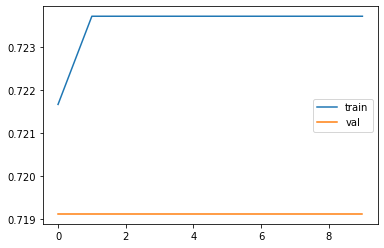

In [209]:
#using matplotlib to find the accuracy relation between training and test
from matplotlib import pyplot



pyplot.plot(history.history['sparse_categorical_accuracy'],label = 'train')
pyplot.plot(history.history['val_sparse_categorical_accuracy'],label = 'val')
pyplot.legend()
pyplot.show()

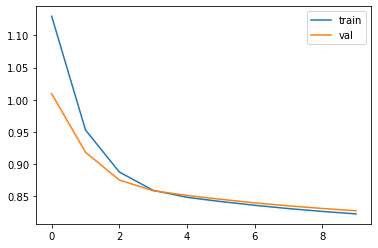

In [210]:

pyplot.plot(history.history['loss'],label = 'train')
pyplot.plot(history.history['val_loss'],label = 'val')
pyplot.legend()
pyplot.show()

In [211]:
#predict the test data from the trained model
for x, y in test_ds.take(1):
  print(model.predict(x))
  print(y)

[[0.1676747  0.7251155  0.10720979]
 [0.18415748 0.71569526 0.10014735]
 [0.1708597  0.6719453  0.15719493]
 ...
 [0.08274756 0.76451373 0.15273863]
 [0.05709295 0.7581958  0.18471123]
 [0.07154328 0.7695981  0.15885854]]
tf.Tensor(
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 2 1 1 1 0 1 1 1 1 1 0 1 2 1 0 0 1 1 1 0
 2 2 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 2 2 1 1 0 2 1 1 1 1 2 1 1 1
 2 1 1 1 0 0 1 1 1 1 2 1 2 1 0 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1
 1 0 2 0 2 1 1 2 1 1 2 2 0 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 2 1 1 0 2 1 1 1 2 0 1 1 1 2 1 0 1 2 1 1 0 1 1 0 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 0 1 2 1 1 1 1 2 1 2 2 1 2 2 2 1 0 2 1 1 1 1
 0 1 1 1 1 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 0 2 2 1 2 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 2 0 0 1 2 0 1 1 1 1 1 2 0 1 0 0 1 1 1 1
 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 1 1
 2 1 1 0 2 2 1 1 

In [213]:
#find accuracy of the test data.
loss,accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

108/108 [==============================] - 5s 47ms/step - loss: 0.8248 - sparse_categorical_accuracy: 0.7202
Accuracy 0.72018015


Execute the below steps for classifiying labels from features using **tensorflow's DNN Classifier**

In [0]:
y_train = train.pop('fit')
y_test = test.pop('fit')

In [0]:
def input_fn(features, labels, training=True, batch_size=256):
  
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [217]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
  
    hidden_units=[30, 10],
   
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplpq60hlf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f95bb6ba208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [218]:

classifier.train(
    input_fn=lambda: input_fn(train, y_train, training=True),
    steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmplpq60hlf/model.ckpt.
INFO:tensorflow:loss = 348.38953, step = 1
INFO:tensorflow:global_step/sec: 37.8603
INFO:tensorflow:loss = 188.19626, step = 101 (2.649 sec)
INFO:tensorflow:global_step/sec: 45.1135
INFO:tensorf

In [224]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T04:12:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplpq60hlf/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-04:12:13
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.72938776, average_loss = 0.68927896, global_step = 5000, loss = 175.83347
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmplpq60hlf/model.ckpt-5000

Test set accuracy: 0.729



Execute the below steps for classifiying labels from features using **tensorflow's Linear Model**

In [0]:
def make_input_fn(data_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    label_df = data_df.pop('fit')
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [0]:
train_input_fn = make_input_fn(train)
eval_input_fn = make_input_fn(val, num_epochs=1, shuffle=False)

In [232]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=3)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpirl6ao9y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f95bbe30470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updat

In [233]:
eval_test_fn = make_input_fn(test, num_epochs=1, shuffle=False)
result_test = linear_est.evaluate(eval_test_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T04:20:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpirl6ao9y/model.ckpt-54850
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-04:20:17
INFO:tensorflow:Saving dict for global step 54850: accuracy = 0.7348394, average_loss = 0.70113236, global_step = 54850, loss = 22.435417
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54850: /tmp/tmpirl6ao9y/model.ckpt-54850
